# Business Model Analysis: upon.io
Using data from fashionphile.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor as RDFR
from sklearn.ensemble import RandomForestClassifier as RDFC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
import requests
import math

%matplotlib inline

In [23]:
df = pd.read_csv('data.csv')

In [19]:
print('Brands:', df.brand.unique())

Brands: ['Fashionphile SWAG' 'Bottega Veneta' 'Gucci' 'Marc Jacobs' 'Prada'
 'Louis Vuitton' 'Balenciaga' 'Jimmy Choo' 'Fendi' 'Chanel'
 'Yves Saint Laurent' nan 'Miu Miu' 'Hermes' 'Goyard' 'Burberry' 'Chloe'
 'Valentino' 'Christian Dior' 'Nancy Gonzalez' 'Lanvin'
 'Christian Louboutin' 'Judith Leiber' 'Alexander Wang' 'Givenchy'
 'Celine' 'Chopard' 'David Yurman' 'Tiffany' 'Cartier'
 'Van Cleef & Arpels' 'Mikimoto' 'Alexander McQueen' 'Tom Ford'
 'Proenza Schouler' 'Stella McCartney' 'Mulberry' 'Bulgari'
 'Harry Winston' 'Rolex' 'Phillip Lim' 'Versace' 'Dolce Gabbana'
 'Judith Ripka' 'Oliver Peoples' 'Patek Philippe' 'John Hardy' 'Loewe'
 'MCM' 'Delvaux' 'Panerai' 'Mansur Gavriel' 'Alaia' 'Omega'
 'Manolo Blahnik' 'IWC']


In [24]:
# Drop irrelevant brands that are not bags, drop url column
df = df.drop(['url'], axis = 1)
not_bag = ['Fashionphile SWAG', 'Christian Louboutin', 'Chopard','David Yurman', 'Tiffany', 'Cartier',
          'Van Cleef & Arpels', 'Mikimoto', 'Tom Ford', 'Bulgari', 'Harry Winston', 'Rolex',
          'Judith Ripka', 'Oliver Peoples', 'Patek Philippe', 'John Hardy', 'Panerai', 'Omega',
          'Manolo Blahnik', 'IWC']
for name in not_bag:
    df = df[df['brand'] != name].copy()

df.head()

,id,name,brand,price,retail,original,buyback,bag,like,sold,condition,listed_date,sold_date
3,10073,BOTTEGA VENETA Leather Wing Tip Flats 35 Nero,Bottega Veneta,NaN,NaN,NaN,NaN,NaN,NaN,True,Good,2018-11-22,2018-11-17
4,10074,GUCCI Logo Sunglasses 130 1430/S Gray,Gucci,NaN,NaN,NaN,NaN,NaN,NaN,True,Good,2018-11-22,2018-11-17
5,10075,MARC JACOBS Denim Rocker Black,Marc Jacobs,NaN,NaN,NaN,NaN,NaN,NaN,True,Excellent,2018-11-22,2018-11-17
6,10076,PRADA Leather Antic Black,Prada,NaN,NaN,NaN,NaN,NaN,NaN,True,Good,2018-11-22,2018-11-17
7,10077,LOUIS VUITTON Epi Sarah Wallet Porte-Monnaie C...,Louis Vuitton,NaN,NaN,NaN,NaN,NaN,NaN,True,Good,2018-11-22,2018-11-17


# Data Summary

In [15]:
print('Total number of listed items:', df.shape[0])
print('Items with price information:', df[df['price'].notnull()].shape[0])
print('Items with both price and retail information:', 
      df[df['price'].notnull() & df['retail'].notnull()].shape[0])
print('Items sold between 2018-11-17 and 2018-12-19:', 
      df[df['sold']==True & (df['sold_date']!='2018-11-17')].shape[0])
print('Items not yet sold:', df[df['sold'].isnull()].shape[0])

Total number of listed items: 252616
Items with price information: 13254
Items with both price and retail information: 8070
Items sold between 2018-11-17 and 2018-12-19: 7871
Items not yet sold: 6223


# Volume of sales

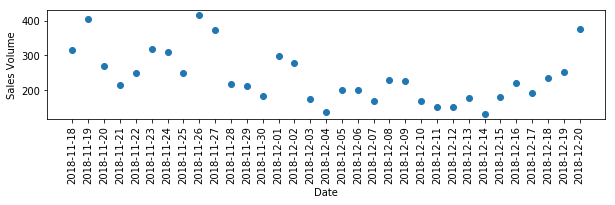

In [26]:
# dates of sales we tracked
sales_dates = df[df['sold'] == True & (df['sold_date']!='2018-11-17')]['sold_date'].unique()

# sales volume by day
sales_volume = {} #create an empty dict to store sales volume every two days
for i in sales_dates:
    sales_volume[i] = df[df['sold']==True & (df['sold_date']==i)].shape[0]
sales_volume_df = df.from_dict(sales_volume, orient='index', columns=['volume'])
sales_volume_df.sort_index(inplace=True)

plt.figure(figsize=(10,2))
plt.plot(sales_volume_df, 'o')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.show()

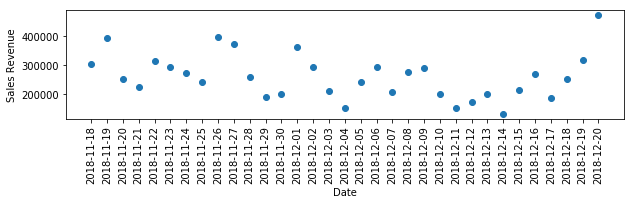

In [27]:
# total sales revenue by date
sales_revenue = {}
for i in sales_dates:
    sales_revenue[i] = df[df['sold']==True & (df['sold_date']==i)]['price'].sum(skipna = True).round()
sales_revenue_df = df.from_dict(sales_revenue, orient='index', columns=['revenue'])
sales_revenue_df.sort_index(inplace=True)

plt.figure(figsize=(10,2))
plt.plot(sales_revenue_df, 'o')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Sales Revenue')
plt.show()

In [28]:
daily_volume = round(sales_volume_df.values.sum()/33, 2)
daily_revenue = round(sales_revenue_df.values.sum()/33, 2)
print('Average sales volume per day:', daily_volume, 'bags.')
print('Average revenue per day:', daily_revenue)

Average sales volume per day: 238.52 bags.
Average revenue per day: 261792.88


# Brand Populatiry Analysis
### Overall popularity by brand

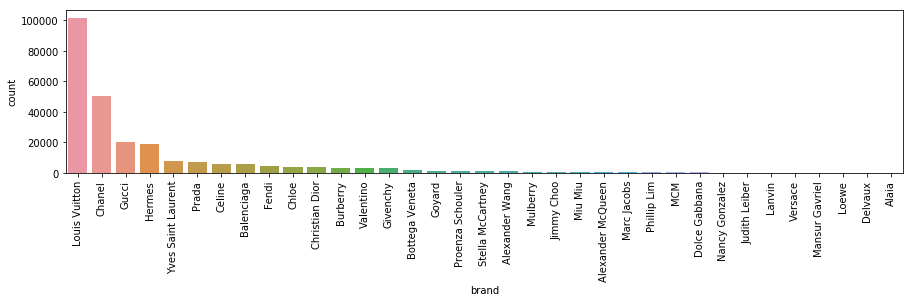

In [29]:
# Overall popularity sold+available
f, (ax1) = plt.subplots(1,1, figsize = (15, 3))
sns.countplot(x = df['brand'], data = df, ax = ax1, order = df['brand'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

### Available items

Total number of sold itmes: 246393
Total number of available itmes: 6223


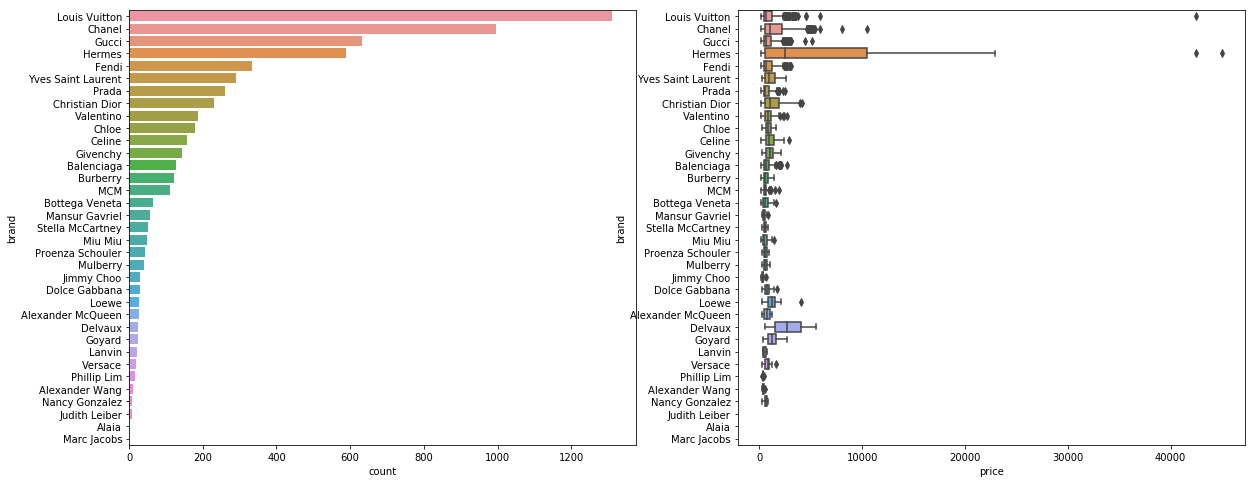

In [31]:
df_sold = df[df['sold']==True]
df_available = df[df['sold'].isnull()]
print('Total number of sold itmes:', df[df['sold']==True].shape[0])
print('Total number of available itmes:', df[df['sold'].isnull()].shape[0])

f, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 8))
sns.countplot(y = df_available['brand'], data = df_available, ax = ax1, 
              order = df_available['brand'].value_counts().index)
sns.boxplot(y = df_available['brand'], x = df_available['price'], data = df_available, ax = ax2, 
            order = df_available['brand'].value_counts().index)
# plt.xticks(rotation = 90)
plt.show()

In [34]:
# counting brand popularity
brand_popularity_percentage = pd.DataFrame(df['brand'].value_counts()/df['brand'].shape[0])
brand_popularity_percentage.head(n=10)

,brand
Louis Vuitton,0.402350
Chanel,0.198139
Gucci,0.079073
Hermes,0.073970
Yves Saint Laurent,0.030746
Prada,0.028795
Celine,0.024128
Balenciaga,0.022247
Fendi,0.018550
Chloe,0.015047


### Popularity by item

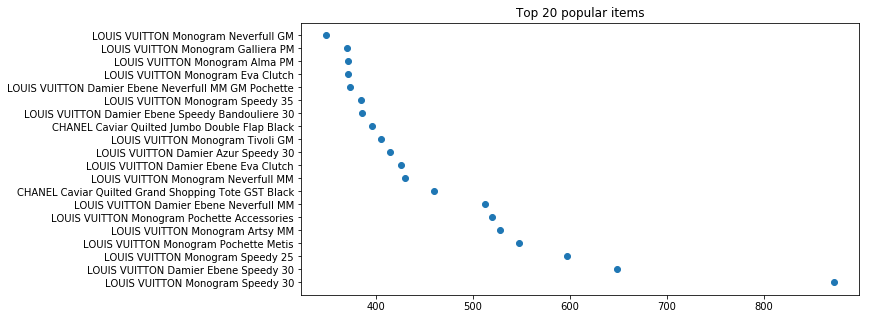

In [32]:
df_popular = pd.DataFrame(df['name'].value_counts())
plt.figure(figsize=(10,5))
plt.plot(df_popular[:20].values, df_popular[:20].index, 'o')
plt.title('Top 20 popular items')
plt.show()

In [35]:
# counting brand popularity
name_popularity_percentage = pd.DataFrame(df['name'].value_counts()/df['name'].shape[0])
name_popularity_percentage.head(n=10)

,name
LOUIS VUITTON Monogram Speedy 30,0.003452
LOUIS VUITTON Damier Ebene Speedy 30,0.002569
LOUIS VUITTON Monogram Speedy 25,0.002363
LOUIS VUITTON Monogram Pochette Metis,0.002169
LOUIS VUITTON Monogram Artsy MM,0.002090
LOUIS VUITTON Monogram Pochette Accessories,0.002058
LOUIS VUITTON Damier Ebene Neverfull MM,0.002031
CHANEL Caviar Quilted Grand Shopping Tote GST Black,0.001821
LOUIS VUITTON Monogram Neverfull MM,0.001702
LOUIS VUITTON Damier Ebene Eva Clutch,0.001686


### Adding item and brand popularity columns to dataframe based on frequency of appearance

In [36]:
# adding popularity columns to dataframe
df['item_popularity'] = df.groupby('name')['name'].transform('count')/df['name'].shape[0]
df['brand_popularity'] = df.groupby('brand')['brand'].transform('count')/df['brand'].shape[0]

In [37]:
df.head()

,id,name,brand,price,retail,original,buyback,bag,like,sold,condition,listed_date,sold_date,item_popularity,brand_popularity
3,10073,BOTTEGA VENETA Leather Wing Tip Flats 35 Nero,Bottega Veneta,NaN,NaN,NaN,NaN,NaN,NaN,True,Good,2018-11-22,2018-11-17,0.000008,0.008250
4,10074,GUCCI Logo Sunglasses 130 1430/S Gray,Gucci,NaN,NaN,NaN,NaN,NaN,NaN,True,Good,2018-11-22,2018-11-17,0.000004,0.079073
5,10075,MARC JACOBS Denim Rocker Black,Marc Jacobs,NaN,NaN,NaN,NaN,NaN,NaN,True,Excellent,2018-11-22,2018-11-17,0.000008,0.002822
6,10076,PRADA Leather Antic Black,Prada,NaN,NaN,NaN,NaN,NaN,NaN,True,Good,2018-11-22,2018-11-17,0.000004,0.028795
7,10077,LOUIS VUITTON Epi Sarah Wallet Porte-Monnaie C...,Louis Vuitton,NaN,NaN,NaN,NaN,NaN,NaN,True,Good,2018-11-22,2018-11-17,0.000004,0.402350


# Constructing a daily bucket of goods
Suppose on average we sell `daily_volume` of items. Using brand popularity, determine how many bags from each brand we will sell. Using item popularity table, determine what items and how many of them we sell in each brand every day. First return a list of names `bucket_items`. Then return a full table with more information `bucket_full {names, brand, popularity, like, bag, retail}`.

In [38]:
bucket_brand_volume = round(brand_popularity_percentage * daily_volume)
bucket_brand_volume[:15]

,brand
Louis Vuitton,96.0
Chanel,47.0
Gucci,19.0
Hermes,18.0
Yves Saint Laurent,7.0
Prada,7.0
Celine,6.0
Balenciaga,5.0
Fendi,4.0
Chloe,4.0


### Constructing `bucket_items`

In [39]:
# bucket_brand_volume.loc['Louis Vuitton', 'brand']
bucket_items = []
for b in bucket_brand_volume.index:
    units = (bucket_brand_volume.loc[b, 'brand'])
    for i in range(int(units)): 
        bucket_items.append(df[df['brand'] == b].sort_values('item_popularity', 
                         ascending = False).drop_duplicates('item_popularity').iloc[i]['name'])

In [40]:
bucket_items[::15]

['LOUIS VUITTON Monogram Speedy 30',
 'LOUIS VUITTON Monogram Galliera PM',
 'LOUIS VUITTON Monogram Totally MM',
 'LOUIS VUITTON Monogram Tivoli PM',
 'LOUIS VUITTON Damier Ebene Neo Neverfull GM',
 'LOUIS VUITTON Monogram French Purse Wallet',
 'LOUIS VUITTON Damier Azur Neverfull GM',
 'CHANEL Caviar Grand Shopping Tote GST Black',
 'CHANEL Caviar Jumbo Single Flap Black',
 'CHANEL Caviar Quilted New Medium Boy Flap Black',
 'GUCCI Calfskin Matelasse Small GG Marmont Black',
 'HERMES Enamel Narrow Clic Clac H Bracelet PM White',
 'SAINT LAURENT Grain De Poudre Matelasse Chevron Monogram Chain Wallet Black',
 'CELINE Drummed Calfskin Mini Luggage Black',
 'CHLOE Calfskin Suede Medium Faye Shoulder Bag Motty Grey',
 'GIVENCHY Shiny Lord Calfskin Medium Antigona Black']

### Constructing `bucket_full_ready`, this is used to predict price using the price prediction model built below

In [41]:
bucket_full = pd.DataFrame(columns=['name','brand','retail','like','bag','brand_popularity','item_popularity'])

In [42]:
bucket_full['name'] = bucket_items

In [43]:
# fill in brand information
b = df.set_index('name')['brand']
b = b[~b.index.duplicated(keep='first')]
bucket_full['brand'] = bucket_full['brand'].fillna(bucket_full['name'].map(b))

In [44]:
# fill in retail information using data containing retail and price information
df_retail = df[df['retail'].notnull()].copy()
r = df_retail.set_index('name')['retail']
r = r[~r.index.duplicated(keep='first')]
bucket_full['retail'] = bucket_full['retail'].fillna(bucket_full['name'].map(r)).fillna('1096') 

In [45]:
# fill in brand popularity 
bp = df.set_index('name')['brand_popularity']
bp = bp[~bp.index.duplicated(keep='first')]
bucket_full['brand_popularity'] = bucket_full['brand_popularity'].fillna(bucket_full['name'].map(bp))

In [46]:
# fill in item popularity 
ip = df.set_index('name')['item_popularity']
ip = ip[~ip.index.duplicated(keep='first')]
bucket_full['item_popularity'] = bucket_full['item_popularity'].fillna(bucket_full['name'].map(ip))

In [47]:
# fill in like information
df_like = df[df['like'].notnull()]
df_like_grouped = df_like.groupby('name')
df_like_mean = df_like_grouped.agg({'like': [np.mean]})
l = df_like_mean.set_index(df_like_mean.index)['like']['mean']
bucket_full['like'] = bucket_full['like'].fillna(bucket_full['name'].map(l)).fillna(44) 

In [48]:
# fill in bag information
df_bag = df[df['bag'].notnull()]
df_bag_grouped = df_bag.groupby('name')
df_bag_mean = df_bag_grouped.agg({'bag': [np.mean]})
bag = df_bag_mean.set_index(df_bag_mean.index)['bag']['mean']
bucket_full['bag'] = bucket_full['bag'].fillna(bucket_full['name'].map(bag)).fillna(7)

In [49]:
df_price = df[df['price'].notnull()]
df_price_retail = df_price[df_price['retail'].notnull()].copy()

# convert brand to dummy columns 
dummies = pd.get_dummies(bucket_full['brand'])
a = dummies.columns.values
b = pd.get_dummies(df_price_retail['brand']).columns
dummies_extra = set(a)^set(b)
bucket_full_brands = pd.concat([dummies, pd.DataFrame(columns=dummies_extra)], axis = 1).sort_index(axis=1).fillna(0)

# create bucket_full_condition column with 5 
bucket_full_condition = pd.DataFrame(columns = ['condition'], index = bucket_full.index).fillna(5)

In [50]:
# bucket_full_ready is ready to be used for prediction using model 
bucket_full_ready_name = pd.concat([bucket_full.name, 
                                    bucket_full.retail.str.replace(',', '').astype(float).apply(np.log),
                                    bucket_full.bag,
                                    bucket_full.like,
                                    bucket_full_condition,
                                    bucket_full.item_popularity,
                                    bucket_full.brand_popularity,
                                    bucket_full_brands], axis = 1)
bucket_full_ready_name.shape

(237, 41)

In [51]:
bucket_full_ready = bucket_full_ready_name.drop(['name'], axis = 1)
bucket_full_ready.shape

(237, 40)

In [52]:
## add quadratic and cubic terms
addon = []
for col in ['retail', 'bag', 'like', 'item_popularity', 'brand_popularity']:
    new_name = 'sq_' + col
    addon += [new_name]
    bucket_full_ready[new_name] = bucket_full_ready[col] ** 2
    new_name = 'cubic_' + col
    addon += [new_name]
    bucket_full_ready[new_name] = bucket_full_ready[col] ** 3

In [53]:
#standardize
bucket_full_ready_temp = bucket_full_ready.values #returns a numpy array
min_max_scaler = preprocessing.RobustScaler()
bucket_full_ready_scaled = min_max_scaler.fit_transform(bucket_full_ready_temp)
bucket_full_ready_std = pd.DataFrame(bucket_full_ready_scaled, columns=bucket_full_ready.columns.values)

In [54]:
bucket_full_ready_std['condition'].replace(to_replace=0, value=1, inplace=True)

In [55]:
bucket_full_ready_std.head()

,retail,bag,like,condition,item_popularity,brand_popularity,Alexander McQueen,Alexander Wang,Balenciaga,Bottega Veneta,...,sq_retail,cubic_retail,sq_bag,cubic_bag,sq_like,cubic_like,sq_item_popularity,cubic_item_popularity,sq_brand_popularity,cubic_brand_popularity
0,-0.124730,-0.095238,-0.469169,1.0,5.039735,0.621875,0.0,0.0,0.0,0.0,...,-0.119184,-0.113827,-0.083257,-0.071602,-0.360139,-0.272312,19.427685,80.450064,0.783987,0.886081
1,-0.124730,-0.076190,-0.131367,1.0,3.562914,0.621875,0.0,0.0,0.0,0.0,...,-0.119184,-0.113827,-0.066931,-0.057837,-0.112859,-0.094698,10.618881,33.069642,0.783987,0.886081
2,-0.159100,0.800000,-0.175156,1.0,3.218543,0.621875,0.0,0.0,0.0,0.0,...,-0.151810,-0.144780,0.859701,0.917090,-0.148402,-0.122860,8.936190,25.703732,0.783987,0.886081
3,0.889765,0.585185,1.491196,1.0,2.894040,0.621875,0.0,0.0,0.0,0.0,...,0.885887,0.881934,0.600712,0.609811,1.936515,2.533946,7.479107,19.842256,0.783987,0.886081
4,1.043942,0.857143,-0.289229,1.0,2.761589,0.621875,0.0,0.0,0.0,0.0,...,1.045756,1.047619,0.932074,1.007249,-0.236113,-0.188727,6.920218,17.730520,0.783987,0.886081


In [56]:
np.sum(np.sum(bucket_full_ready_std.isnull()))

0

# Pricing model
To predict sales price using brand, name, retail, bag, like, sold, condition, etc

In [57]:
# entires with both sale price and retail price information 
df_price = df_price[df_price['price'].notnull()]
df_price_retail = df_price[df_price['retail'].notnull()].copy()
df_price_retail.shape

(8070, 15)

### Price distribution by brands: Louis Vuitton, Chanel, Hermes

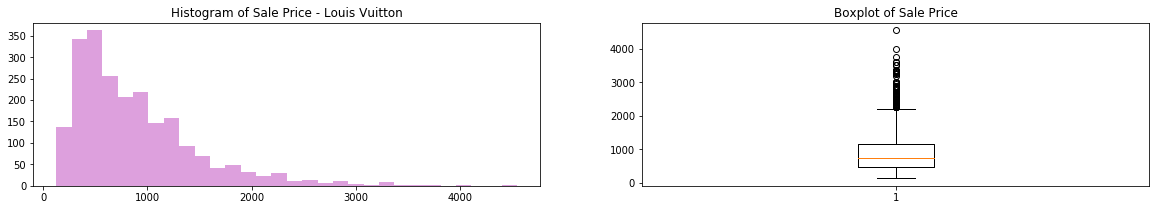

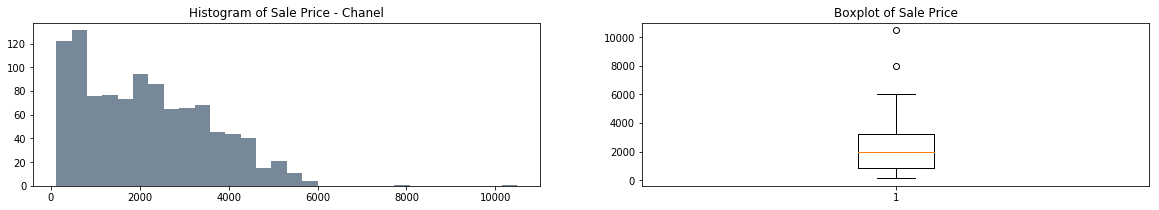

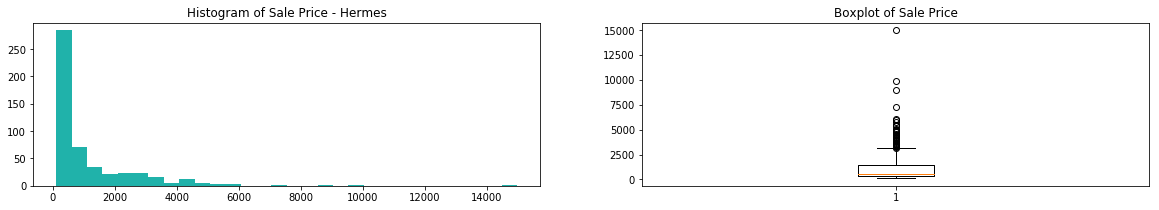

In [58]:
# Louis Vuitton
df_LV = df_price_retail[df_price_retail['brand'] == 'Louis Vuitton']

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 3))
ax1.hist(df_LV['price'], bins=30, color='plum')
ax2.boxplot(df_LV['price'])

ax1.set_title("Histogram of Sale Price - Louis Vuitton")
ax2.set_title("Boxplot of Sale Price")
plt.show()

# Chanel
df_chanel = df_price_retail[df_price_retail['brand'] == 'Chanel']

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 3))
ax1.hist(df_chanel['price'], bins=30, color='lightslategray')
ax2.boxplot(df_chanel['price'])

ax1.set_title("Histogram of Sale Price - Chanel")
ax2.set_title("Boxplot of Sale Price")
plt.show()

# Hermes
df_hermes = df_price_retail[df_price_retail['brand'] == 'Hermes']

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 3))
ax1.hist(df_hermes['price'], bins=30, color='lightseagreen')
ax2.boxplot(df_hermes['price'])

ax1.set_title("Histogram of Sale Price - Hermes")
ax2.set_title("Boxplot of Sale Price")
plt.show()

#### Convert `condition` to reflect order

In [59]:
# map condition to rating scale
df_price_retail['condition'] = df_price_retail['condition'].map({'New': 5, 
                                                                 'Excellent': 4, 
                                                                 'Very Good': 3, 
                                                                 'Good': 2, 
                                                                 'Fair': 1})

#### Create dummy variables for `brand`, log transformation of `price`.

In [68]:
# select relevant columns, convert to dummy variables, log transform retail and price
df_price_retail_dummy = pd.concat([df_price_retail.retail.str.replace(',', '').astype(float).apply(np.log),
                                   df_price_retail.bag.fillna(0),
                                   df_price_retail.like.fillna(0),
                                   df_price_retail.condition.fillna(0),
                                   df_price_retail.item_popularity.fillna(0),
                                   df_price_retail.brand_popularity.fillna(0),
                                   pd.get_dummies(df_price_retail['brand']),
                                   df_price_retail.price.astype(float).apply(np.log)], axis = 1)
df_price_retail_dummy = df_price_retail_dummy[df_price_retail_dummy['retail']!=-np.inf]

In [874]:
df_price_retail_dummy.head()

,retail,bag,like,condition,item_popularity,brand_popularity,Alexander McQueen,Alexander Wang,Balenciaga,Bottega Veneta,...,Mulberry,Nancy Gonzalez,Phillip Lim,Prada,Proenza Schouler,Stella McCartney,Valentino,Versace,Yves Saint Laurent,price
142891,7.989560,8.0,159.0,3,0.000012,0.030746,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6.214608
148346,7.240650,13.0,26.0,4,0.000004,0.015047,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.633318
162929,6.396930,2.0,59.0,2,0.000004,0.018550,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.521461
163453,7.522941,0.0,34.0,3,0.000012,0.003175,0,0,0,0,...,1,0,0,0,0,0,0,0,0,6.572283
172739,7.489971,6.0,53.0,3,0.000012,0.013538,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.978886


In [62]:
# training and testing datasets
x = df_price_retail_dummy.drop(['price'], axis = 1)
y = df_price_retail_dummy['price']

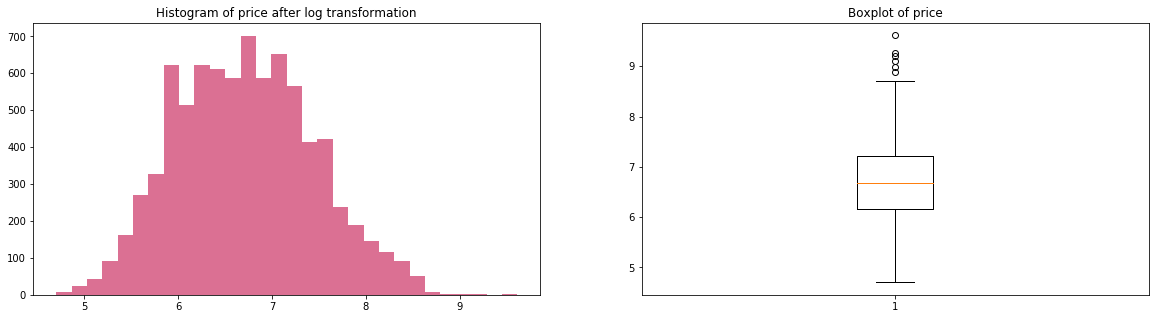

In [63]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.hist(y, bins=30, color='palevioletred')
ax2.boxplot(y)
ax1.set_title("Histogram of price after log transformation")
ax2.set_title("Boxplot of price")
plt.show()

#### Check for nonlinearity

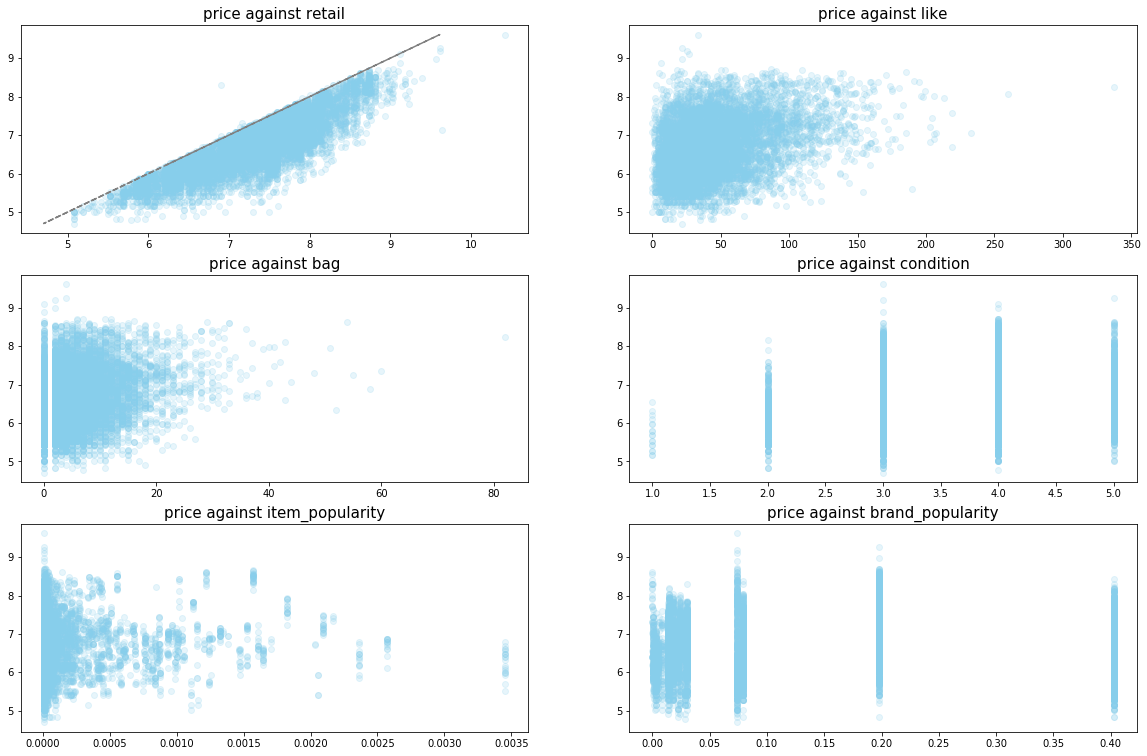

In [64]:
# Check for nonlinearity 
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(20, 13))
ax1.set_title('price against retail',fontsize=15)
ax1.plot(x['retail'].values, y,'o',color='skyblue', alpha = 0.2)
ax1.plot(y, y,'--',color='gray')
ax2.set_title('price against like',fontsize=15)
ax2=ax2.plot(x['like'].values, y,'o',color='skyblue', alpha = 0.2)
ax3.set_title('price against bag',fontsize=15)
ax3=ax3.plot(x['bag'].values, y,'o',color='skyblue', alpha = 0.2)
ax4.set_title('price against condition',fontsize=15)
ax4=ax4.plot(x['condition'].values, y,'o',color='skyblue', alpha = 0.2)
ax5.set_title('price against item_popularity',fontsize=15)
ax5=ax5.plot(x['item_popularity'].values, y,'o',color='skyblue', alpha = 0.2)
ax6.set_title('price against brand_popularity',fontsize=15)
ax6=ax6.plot(x['brand_popularity'].values, y,'o',color='skyblue', alpha = 0.2)

#### Add quadratic and cubic terms

In [65]:
## add quadratic and cubic terms
addon = []
for col in ['retail', 'bag', 'like', 'item_popularity', 'brand_popularity']:
    new_name = 'sq_' + col
    addon += [new_name]
    x[new_name] = x[col] ** 2
    new_name = 'cubic_' + col
    addon += [new_name]
    x[new_name] = x[col] ** 3

#### Standardize

In [66]:
# standardize
x_temp = x.values #returns a numpy array
min_max_scaler = preprocessing.RobustScaler()
x_scaled = min_max_scaler.fit_transform(x_temp)
x = pd.DataFrame(x_scaled, columns=x.columns.values)

x_train = x[:6000]
y_train = y[:6000]

x_test = x[6000:]
y_test = y[6000:]

## Ordinary Linear Regression

R^2 is: 0.8378


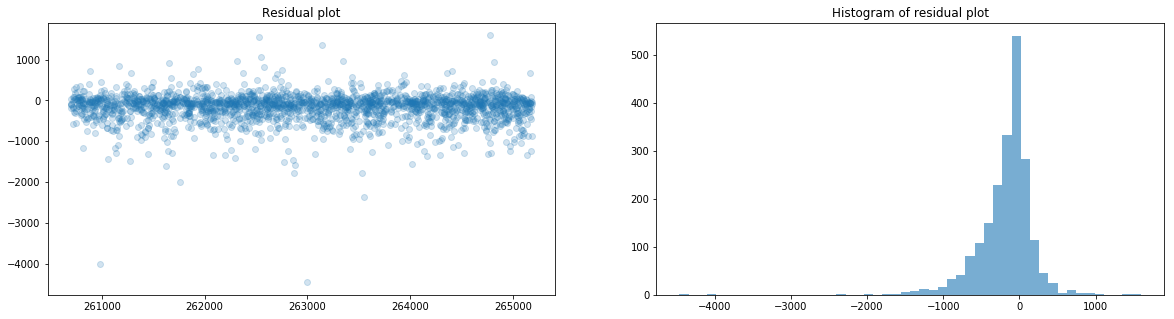

In [77]:
model = Lin_Reg()
model.fit(x_train, y_train)

# print('Coeff is:', model.coef_ )
# print('Intercept is:', model.intercept_ )

score = model.score(x_test, y_test)
print('R^2 is:', round(score,4))

pred = model.predict(x_test)
diff = np.exp(pred) - np.exp(y_test)
f, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 5))
ax1.plot(diff, 'o', alpha = 0.2)
ax2.hist(diff, bins=50, alpha=0.6)
ax1.set_title('Residual plot')
ax2.set_title('Histogram of residual plot')
plt.show()

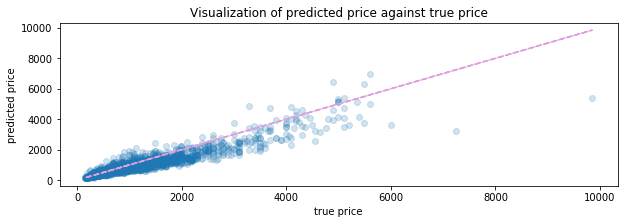

In [78]:
plt.figure(figsize=[10,3])
plt.plot(np.exp(y_test), np.exp(pred), 'o', alpha = 0.2)
plt.plot(np.exp(y_test), np.exp(y_test),'--', color = 'plum', )
plt.xlabel('true price')
plt.ylabel('predicted price')
plt.title('Visualization of predicted price against true price')
plt.show()

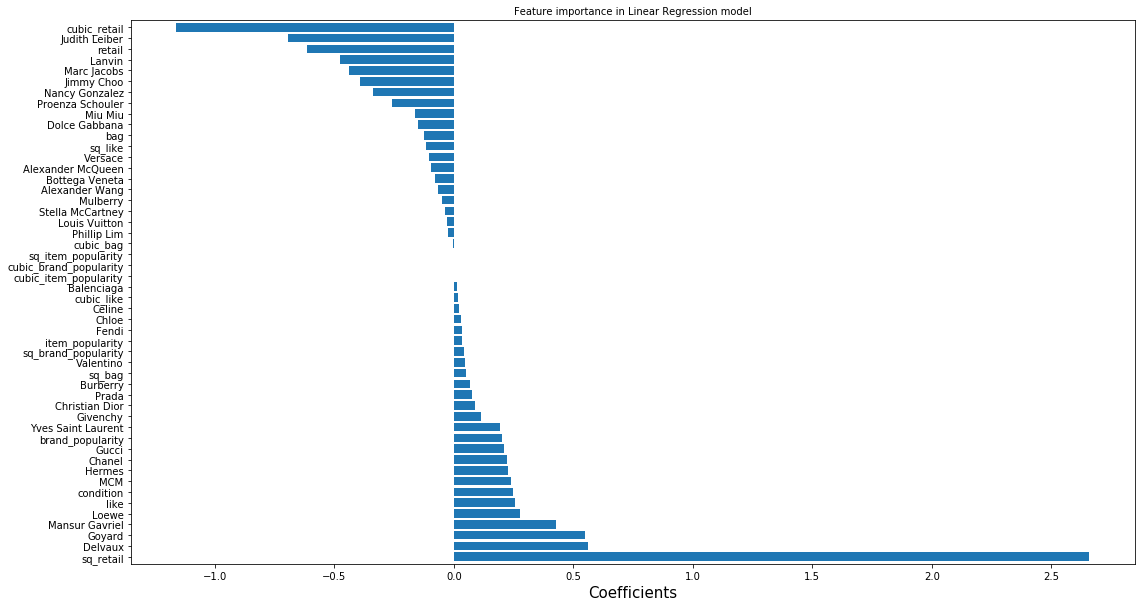

In [79]:
coef = pd.Series(model.coef_, index = x_train.columns)
newcoef = pd.DataFrame(coef)
newcoef_sorted = newcoef.sort_values(by=[0], ascending=False)

matplotlib.rcParams['figure.figsize'] = (18.0, 10.0)
newcoef_sorted.plot(kind = "barh", width = 0.8, legend=None, fontsize = 10)
plt.xlabel('Coefficients',fontsize = 15)
plt.title('Feature importance in Linear Regression model', fontsize = 10)
plt.show()

## Ridge Regression

In [80]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [84]:
num_lambdas = 100
lambdas= np.linspace(-3,3, num_lambdas)
cv_ridge = [rmse_cv(Ridge(alpha = 10**i)).mean() 
            for i in lambdas]
print('Ridge Regression: min RMSE on training set', min(cv_ridge))

min_value = min(cv_ridge)
min_index = cv_ridge.index(min_value)
print("Lambda for min RMSE:", round(lambdas[min_index],4))

Ridge Regression: min RMSE on training set 0.3055579761489603
Lambda for min RMSE: -0.0909


In [83]:
# fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# ax.semilogx(10.0**lambdas, (cv_ridge), c='b', label='Ridge: Train')
# ax.set_xlabel('Regularization parameter $\lambda$')
# ax.set_ylabel(r'$RMSE$')
# ax.grid()
# ax.legend(loc = 'best')

In [85]:
best_ridge = Ridge(alpha = 10**(lambdas[min_index])).fit(x_train, y_train)

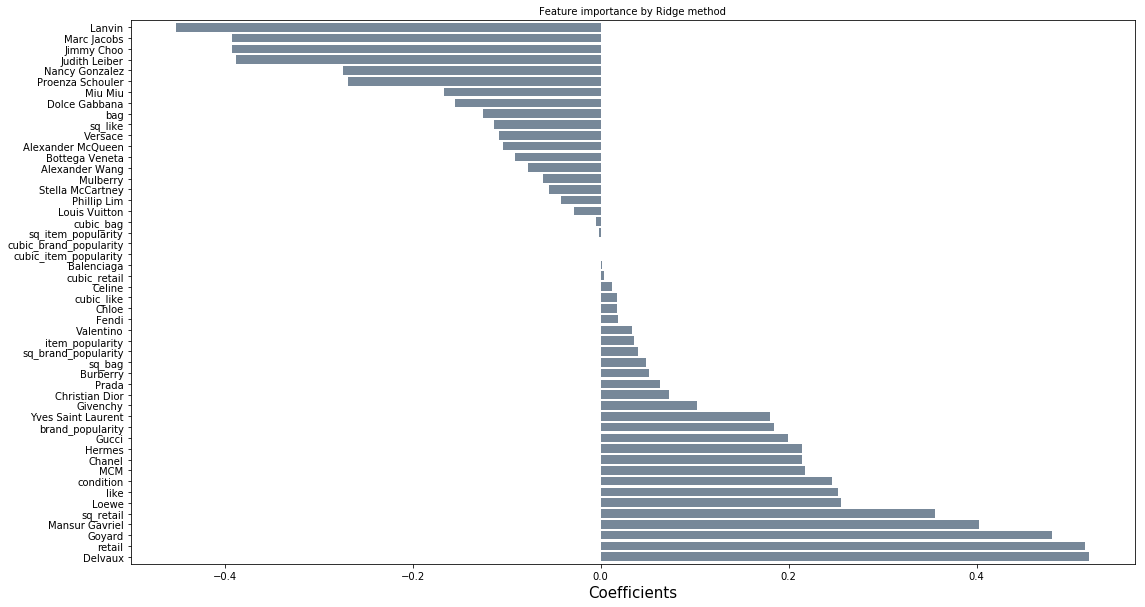

In [87]:
coef = pd.Series(best_ridge.coef_, index = x_train.columns)
newcoef = pd.DataFrame(coef)
newcoef_sorted = newcoef.sort_values(by=[0], ascending=[False])

matplotlib.rcParams['figure.figsize'] = (18.0, 10.0)
newcoef_sorted.plot(kind = "barh", width = 0.8, color = 'lightslategray', legend=None, fontsize = 10)
plt.xlabel('Coefficients',fontsize = 15)
plt.title('Feature importance by Ridge method', fontsize = 10)
plt.show()

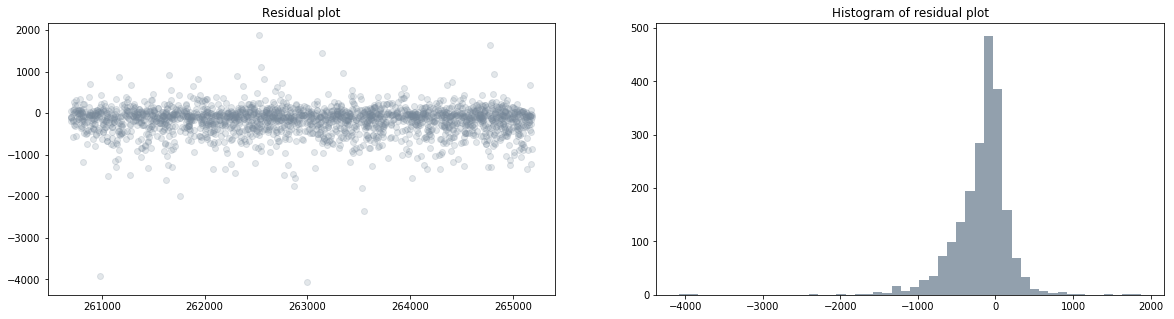

In [88]:
# Predict with our constructed Ridge model
pred = best_ridge.predict(x_test)
diff = np.exp(pred) - np.exp(y_test)

f, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 5))
ax1.plot(diff, 'o', color = 'lightslategray', alpha = 0.2)
ax2.hist(diff, bins=50, color = 'lightslategray', alpha = 0.8)
ax1.set_title('Residual plot')
ax2.set_title('Histogram of residual plot')
plt.show()

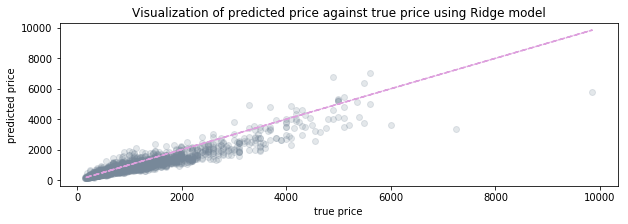

In [897]:
plt.figure(figsize=[10,3])
plt.plot(np.exp(y_test), np.exp(pred), 'o', color = 'lightslategray', alpha = 0.2)
plt.plot(np.exp(y_test), np.exp(y_test),'--', color = 'plum', )
plt.xlabel('true price')
plt.ylabel('predicted price')
plt.title('Visualization of predicted price against true price using Ridge model')
plt.show()

## Random Forest

In [1048]:
df_rf = df[df.retail.notnull() & df.price.notnull()][['brand', 'retail', 'bag', 'like', 'condition', 'price']]

In [1049]:
x_rf = df_rf[['brand', 'retail', 'bag', 'like', 'condition']]
y_rf = df_rf[['price']]

x_rf_train = x_rf[:6000]
y_rf_train = y_rf[:6000]
x_rf_test = x_rf[6000:]
y_rf_test = y_rf[6000:]

In [1050]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_rf_train, y_rf_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [1051]:
# First find out how many trees are necessary to make reproducible predictions
tree_list = [] # to store the number of trees for each model
cv_rdfr_list = [] # to store the rmse score of each model

for trees in range(1, 100, 10): 
    rdfr = RDFR(n_estimators = trees, max_depth = 20, max_features = 20)
    cv_rdfr = rmse_cv(rdfr).mean()
    tree_list += [trees]
    cv_rdfr_list += [cv_rdfr]

# plot rmse score and tree number
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(tree_list, cv_rdfr_list)
plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: could not convert string to float: 'Louis Vuitton'

In [987]:
depth_list = []
feature_list = []
cv_rdfr_list = []
for depth in [5, 10, 15]: 
    for feature in[5, 10, 15]: 
        rdfr = RDFR(n_estimators = 100, max_depth = depth, max_features = feature)
        cv_rdfr = rmse_cv(rdfr).mean()
        depth_list += [depth]
        feature_list += [feature]
        cv_rdfr_list += [cv_rdfr]     

In [988]:
# find best parameters
best_score = min(cv_rdfr_list)
index = cv_rdfr_list.index(best_score)
print("Best depth is {}, best feature number is {}".format(depth_list[index], feature_list[index]))

Best depth is 15, best feature number is 15


In [989]:
# construct best random forest model and important features

rdfr = RDFR(n_estimators = 100, max_depth = 15, max_features = 15) 
rdfr.fit(x_train, y_train)
importances = rdfr.feature_importances_

# To predict use: rdfr.predict(x_test)

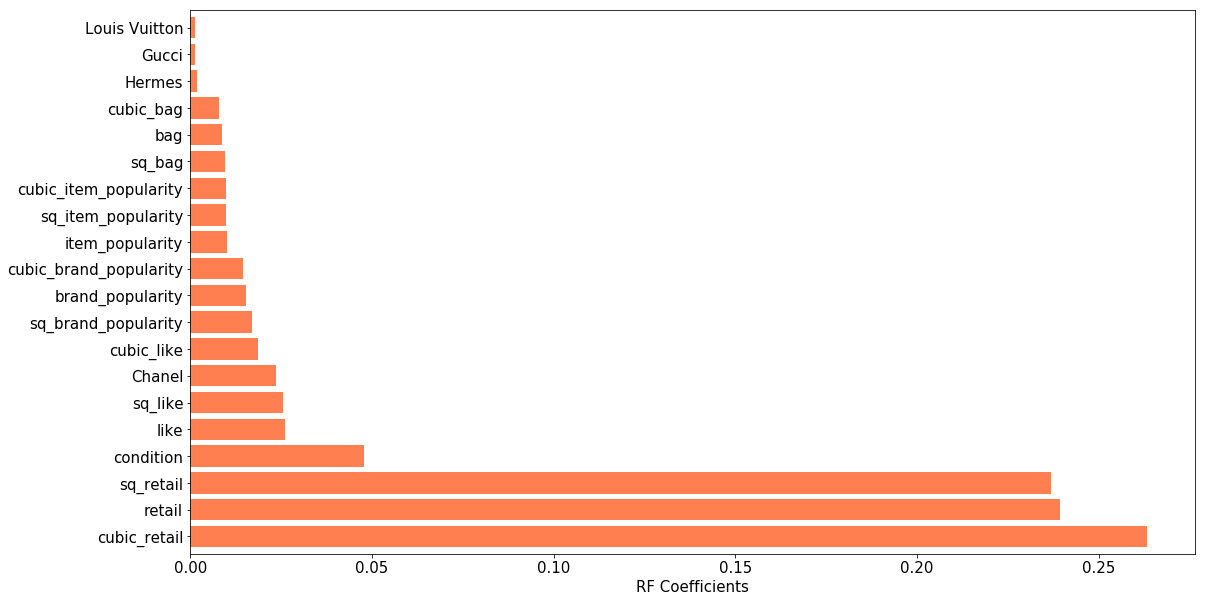

In [990]:
# Plot importance of predictors according to random forest regressor
importances = pd.DataFrame(importances)
importances_sorted = importances.sort_values(by=[0], ascending=[False])
imp_coef = importances_sorted.head(20)
name_index = imp_coef.index.values
feature_index = x_train.columns.values[name_index]
imp_coef.index = feature_index                    

matplotlib.rcParams['figure.figsize'] = (18, 10)
imp_coef.plot(kind = "barh", width = 0.8, color = 'coral', legend=None, fontsize = 15)
plt.xlabel('RF Coefficients', fontsize = 15)
plt.show()

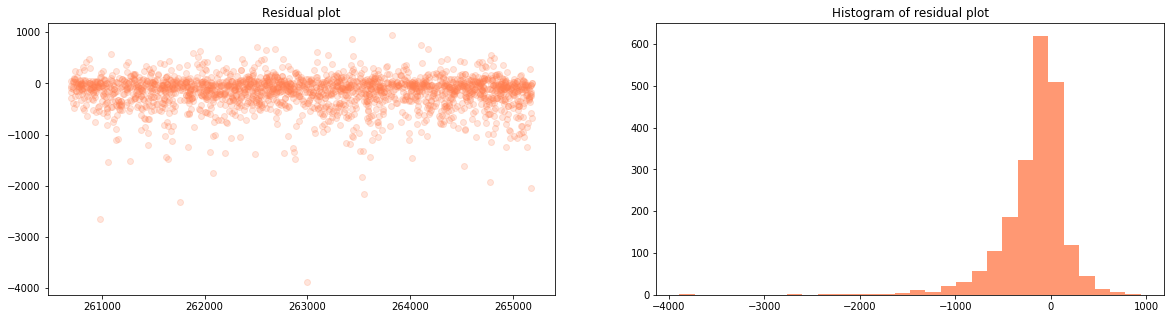

In [991]:
# Predict with our constructed Ridge model
pred = rdfr.predict(x_test)
diff = np.exp(pred) - np.exp(y_test)

f, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 5))
ax1.plot(diff, 'o', color = 'coral', alpha = 0.2)
ax2.hist(diff, bins=30, color = 'coral', alpha = 0.8)
ax1.set_title('Residual plot')
ax2.set_title('Histogram of residual plot')
plt.show()

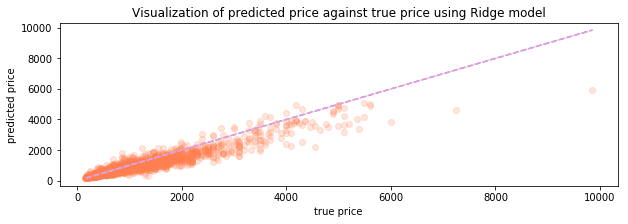

In [992]:
plt.figure(figsize=[10,3])
plt.plot(np.exp(y_test), np.exp(pred), 'o', color = 'coral', alpha = 0.2)
plt.plot(np.exp(y_test), np.exp(y_test),'--', color = 'plum', )
plt.xlabel('true price')
plt.ylabel('predicted price')
plt.title('Visualization of predicted price against true price using Ridge model')
plt.show()

# Business profit analysis using daily bucket

In [993]:
bucket_pred = np.exp(model.predict(bucket_full_ready_std))
# # visualize retail price vs predicted price. predicted price is way off..... 
# plt.figure(figsize=[8,4])
# plt.plot(np.exp(bucket_full_ready_name['retail']), bucket_pred, 'x')
# plt.plot(np.exp(bucket_full_ready_name['retail']), np.exp(bucket_full_ready_name['retail']), '--',color = 'plum')
# plt.xlabel('Retail price')
# plt.ylabel('Predicted sale price')
# plt.show()

In [99]:
bucket_pred = np.exp(bucket_full_ready_name['retail'])*(np.random.normal(0.9, 0.05, (bucket_full_ready_name.shape[0])))

### Build a business analysis table containing: 

`name`, `retail`, `pred_price`, `vat`, `shipping`, `authentication`, `credit_card_charge`, `margin`, `traveler_pay`, `net_profit`

In [101]:
business = pd.DataFrame(columns=['name', 'retail', 'pred_price', 'vat',
                                 'credit_card_charge', 'margin', 'traveler_pay', 'net_profit'])

In [102]:
# Some constants
cc_rate = 0.03 #credit card rate 
shipping = 30 
authentication = 10  

business['name'] = bucket_full_ready_name['name']
business['pred_price'] = bucket_pred
business['retail'] = np.exp(bucket_full_ready_name['retail'])

In [103]:
url = 'https://upon.io/vat/calculate-complete?c=ESP,DEU,FRA,ITA&v='
usdeur = 0.89

def get_vat(price):
    res = requests.get(url + str(int(price * usdeur)))
    return sum(res.json().values()) / 4 / usdeur

business['vat'] = business.apply(lambda row: get_vat(0.9*row['retail']), axis=1)

In [104]:
business['credit_card_charge'] = cc_rate*business['pred_price']
business['margin'] = round((business.pred_price - (business.retail*0.9 - business.vat)
                          - business.credit_card_charge - shipping - authentication),2)
business['traveler_pay'] = round((business.vat*1.1), 2)
business['net_profit'] = round(business.margin - business.traveler_pay, 2)

In [105]:
business[::25]

,name,retail,pred_price,vat,credit_card_charge,margin,traveler_pay,net_profit
0,LOUIS VUITTON Monogram Speedy 30,1020.0,922.738347,112.230337,27.682150,49.29,123.45,-74.16
25,LOUIS VUITTON Monogram Cabas Piano,1070.0,923.874969,118.353933,27.716249,11.51,130.19,-118.68
50,LOUIS VUITTON Damier Azur Galliera PM,1680.0,1664.532569,189.794944,49.935977,252.39,208.77,43.62
75,LOUIS VUITTON Monogram French Purse Wallet,750.0,678.367954,82.162921,20.351039,25.18,90.38,-65.20
100,CHANEL Caviar Quilted Wallet On Chain WOC Black,2500.0,2320.702993,292.845506,69.621090,253.93,322.13,-68.20
125,CHANEL Caviar Medallion Tote Black,1096.0,962.688731,121.696629,28.880662,29.10,133.87,-104.77
150,GUCCI Calfskin Matelasse Small GG Marmont Black,1980.0,1696.219653,226.092697,50.886590,49.43,248.70,-199.27
175,HERMES Knotting Cards Cartes A Nouer Carre Sca...,1096.0,1078.521079,121.696629,32.355632,141.46,133.87,7.59
200,BALENCIAGA Agneau Classic City Black,1835.0,1645.212738,207.452247,49.356382,111.81,228.20,-116.39
225,GIVENCHY Shiny Lord Calfskin Medium Antigona B...,2435.0,2246.596879,282.016854,67.397906,229.72,310.22,-80.50


In [106]:
bucket_margin = round(np.sum(business.margin), 2)
print('Daily possible margin (before paying travelers):', bucket_margin)

Daily possible margin (before paying travelers): 26625.12


In [108]:
bucket_profit = round(np.sum(business.net_profit),2)
print('Daily net profit:', bucket_profit)

Daily net profit: -22861.29
